# Analysis of Factors for Gross Revenue 

Credit: https://www.kaggle.com/danielgrijalvas/movies

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Step 1: Cleaning the Data

In [3]:
movies = pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
print("Number of rows and colums in dataset:", movies.shape)

Number of rows and colums in dataset: (7668, 15)


In [5]:
#check amount of missing values in each column
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#show the top 10 rows with missing values 
null_data = movies[movies.isnull().any(axis=1)]
null_data.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000.0,NaN,ITC Films,115.0
30,My Bodyguard,PG,Comedy,1980,"September 26, 1980 (United States)",7.1,8900.0,Tony Bill,Alan Ormsby,Chris Makepeace,United States,NaN,22482952.0,Twentieth Century Fox,102.0
31,Prom Night,R,Horror,1980,"July 18, 1980 (United States)",5.4,16000.0,Paul Lynch,William Gray,Leslie Nielsen,Canada,NaN,14796236.0,Guardian Trust Company,92.0
32,Smokey and the Bandit II,PG,Action,1980,"August 15, 1980 (United States)",5.3,15000.0,Hal Needham,Hal Needham,Burt Reynolds,United States,NaN,66132626.0,Universal Pictures,100.0
34,Seems Like Old Times,PG,Comedy,1980,"December 19, 1980 (United States)",6.7,9100.0,Jay Sandrich,Neil Simon,Goldie Hawn,United States,NaN,43995918.0,Rastar Films,102.0


In [7]:
#fill the missing values as 0 
movies.fillna(0, inplace = True)
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [8]:
#checking correct data types
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#change all floats to integer
movies[['score', 'votes', 'budget', 'gross', 'runtime']] = movies[['score', 'votes', 'budget', 'gross', 'runtime']].astype('int')

In [11]:
#change object datatype to category data type
#create random number for reach category to be used for analysis
for x in movies.columns:
    if(movies[x].dtype == "object"):
        movies[x] = movies[x].astype("category")
        movies[x] = movies[x].cat.codes
        
movies.sort_values(by="gross", inplace=True, ascending=False)
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,5144,6,0,2015,699,7,876000,1125,2551,525,56,245000000,2069521700,1541,138
7244,536,6,0,2018,193,8,897000,162,744,2242,56,321000000,2048359754,1607,149
7480,6194,5,2,2019,1489,6,222000,1455,1920,677,56,260000000,1670727580,2317,118
6653,2969,6,0,2015,1705,7,593000,517,3569,438,56,150000000,1670516444,2282,124
6043,5502,6,0,2012,2473,8,1300000,1517,2315,2242,56,220000000,1518815515,1607,143


In [13]:
#check datatypes
movies.dtypes

name        int16
rating       int8
genre        int8
year        int64
released    int16
score       int32
votes       int32
director    int16
writer      int16
star        int16
country      int8
budget      int32
gross       int32
company     int16
runtime     int32
dtype: object

In [46]:
#print full final table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(movies)

      name  rating  genre  year  released  score    votes  director  writer  \
6663  5144       6      0  2015       699      7   876000      1125    2551   
7244   536       6      0  2018       193      8   897000       162     744   
7480  6194       5      2  2019      1489      6   222000      1455    1920   
6653  2969       6      0  2015      1705      7   593000       517    3569   
6043  5502       6      0  2012      2473      8  1300000      1517    2315   
6646  2145       6      0  2015       222      7   370000      1189     707   
7494  2131       5      2  2019      2677      6   148000       432    1951   
6644   534       6      0  2015      2236      7   777000      1517    2315   
7247   791       6      0  2018       960      7   661000      2457    3796   
5845  2407       6      1  2011      1446      8   790000       679    4053   
7075  5145       6      0  2017       662      7   581000      2282    3519   
7271  2970       6      0  2018      1800      6   2

In [14]:
#staistics of data
movies.describe()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7.668000e+03,7668.000000,7668.000000,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7668.000000,7668.000000
mean,3755.946531,6.137976,3.633281,2000.405451,1699.907407,5.940402,8.807403e+04,1516.120762,2293.102765,1404.862676,49.464528,2.551350e+07,7.470223e+07,1420.519953,107.205660
std,2164.610796,1.300140,2.759259,11.153508,993.056332,1.022492,1.633011e+05,854.409880,1307.365576,815.264518,14.884773,3.858954e+07,1.622098e+08,709.545035,18.737179
min,0.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.147484e+09,0.000000,0.000000
25%,1889.750000,6.000000,1.000000,1991.000000,853.750000,5.000000,9.100000e+03,786.000000,1159.000000,696.000000,55.000000,0.000000e+00,3.850147e+06,787.750000,95.000000
50%,3763.500000,6.000000,4.000000,2000.000000,1697.000000,6.000000,3.300000e+04,1519.500000,2270.000000,1374.500000,56.000000,1.200000e+07,1.891546e+07,1563.000000,104.000000
75%,5628.250000,7.000000,6.000000,2010.000000,2594.000000,7.000000,9.300000e+04,2272.000000,3414.000000,2137.250000,56.000000,3.200000e+07,7.235230e+07,2130.250000,116.000000
max,7511.000000,12.000000,18.000000,2020.000000,3414.000000,9.000000,2.400000e+06,2948.000000,4535.000000,2814.000000,59.000000,3.560000e+08,2.069522e+09,2385.000000,366.000000


# Step 2: Exploring the Data

<AxesSubplot:title={'center':'Correlation Score'}>

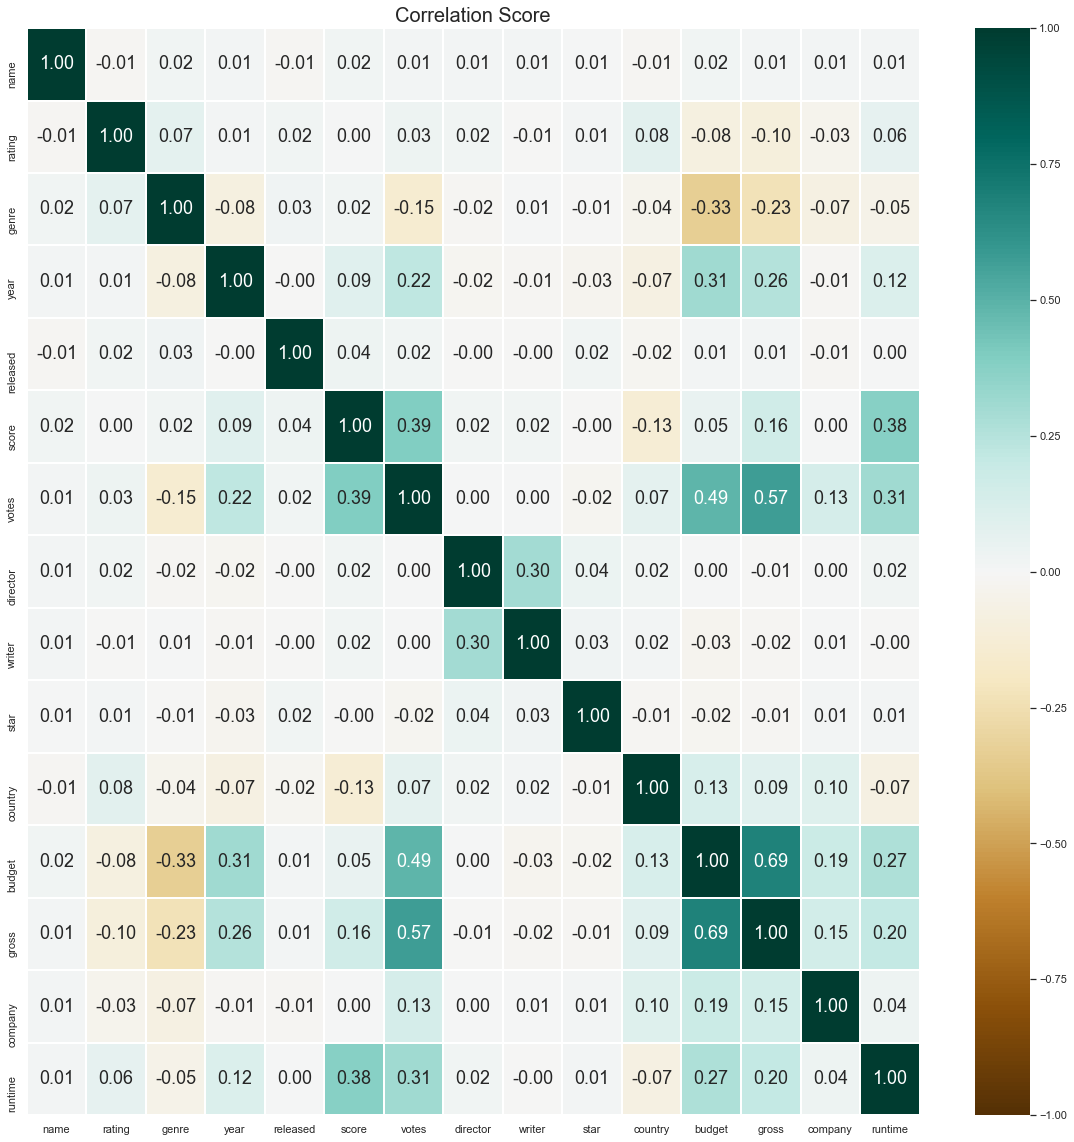

In [52]:
#Create a HeatMap
f,axes = plt.subplots(1,1, figsize=(20,20))
plt.title("Correlation Score", fontsize =20)
sb.heatmap(movies.corr(), vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f", annot_kws={'size':18}, cmap="BrBG")

In [53]:
#list correlation score in descending order
corr = movies.corr() 
c1 = corr.abs().unstack()
c1['gross'].sort_values(ascending = False)

gross       1.000000
budget      0.687124
votes       0.573930
year        0.256331
genre       0.229534
runtime     0.203616
score       0.163748
company     0.148722
rating      0.095355
country     0.091404
writer      0.015602
released    0.014154
name        0.013895
star        0.010628
director    0.005615
dtype: float64

In [54]:
#Create a new dataframe for the top 3
top3=pd.DataFrame(movies[['gross', 'budget','votes','year']])
top3

,gross,budget,votes,year
6663,2069521700,245000000,876000,2015
7244,2048359754,321000000,897000,2018
7480,1670727580,260000000,222000,2019
6653,1670516444,150000000,593000,2015
6043,1518815515,220000000,1300000,2012
...,...,...,...,...
5033,0,1000000,12000,2006
7667,0,0,7,2020
3045,-2147483648,200000000,1100000,1997
7445,-2147483648,356000000,903000,2019


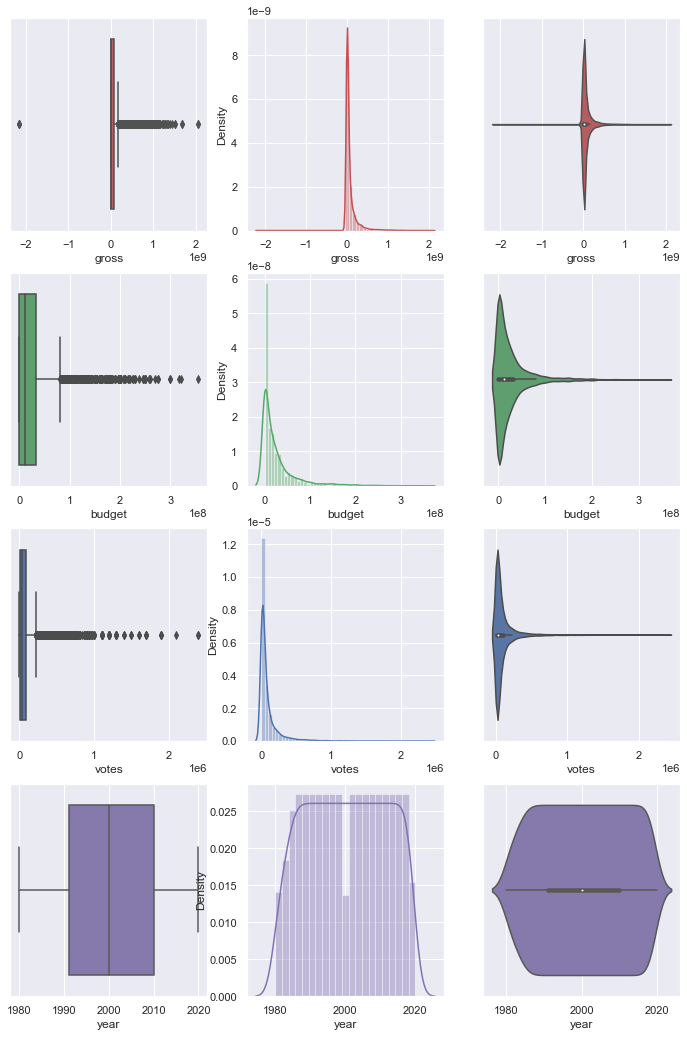

In [63]:
#ignore the warnings
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

# Draw the graphs(boxplot,distplot,violinplot) for each variable in the data for top3
f,axes = plt.subplots(4,3, figsize = (12,18))
colors = ["r", "g", "b", "m"]

count = 0
for variation in top3:
    sb.boxplot(top3[variation], orient = "h", color = colors[count], ax=axes[count,0])
    sb.distplot(top3[variation], color = colors[count], ax=axes[count,1] )
    sb.violinplot(top3[variation], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

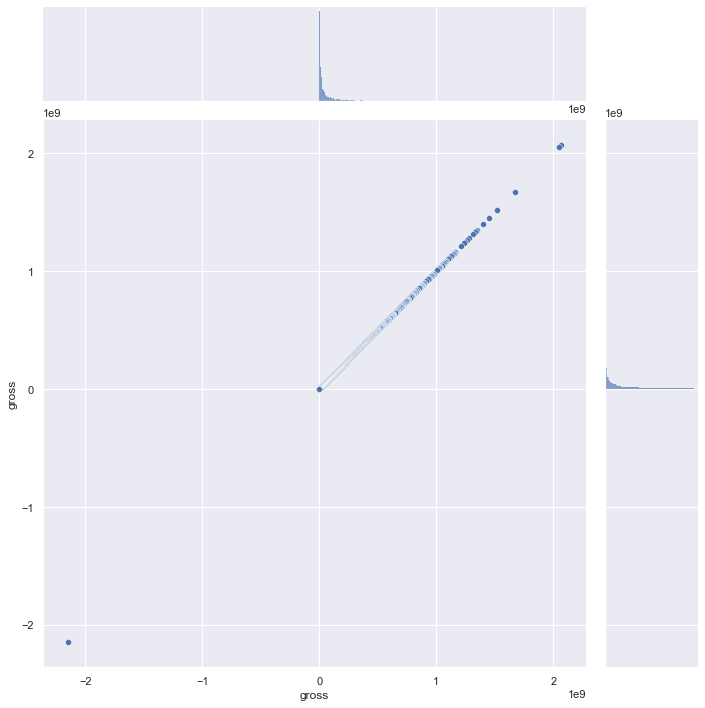

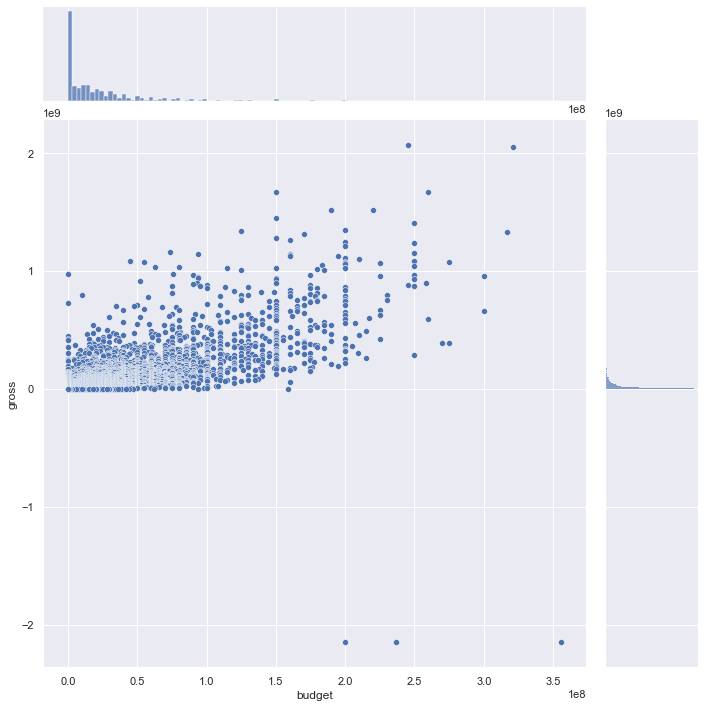

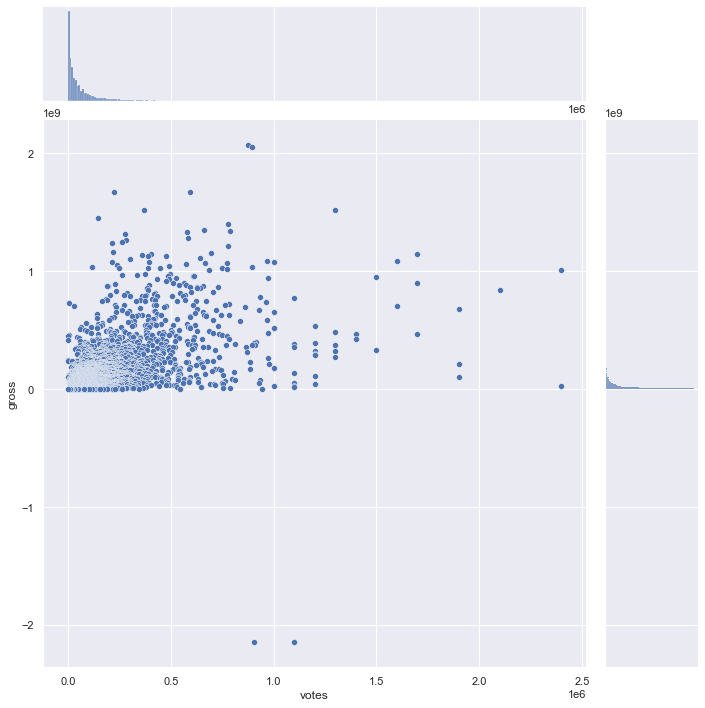

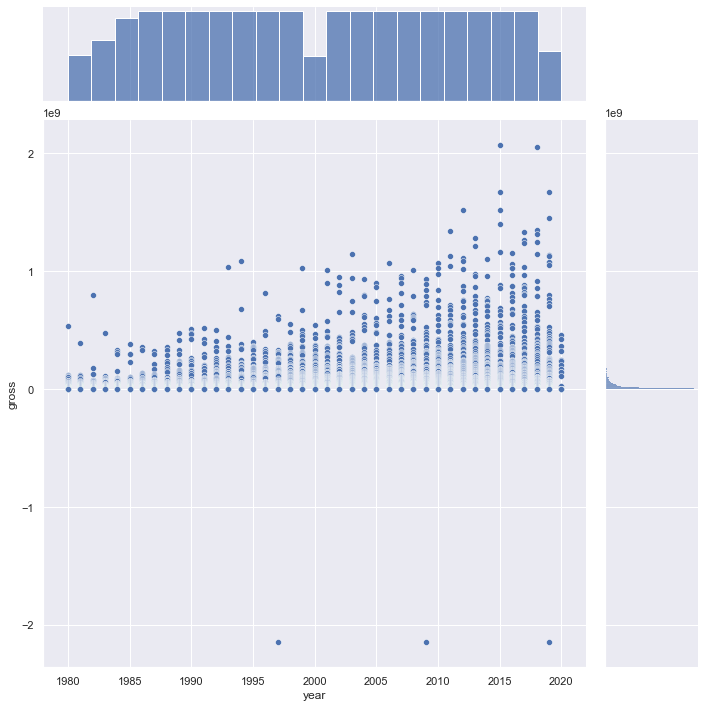

In [56]:
#Create JointPlot for top 3 variables
for i in top3:
    sb.jointplot(data = top3, x = i, y = "gross", height = 10)

<AxesSubplot:xlabel='budget', ylabel='gross'>

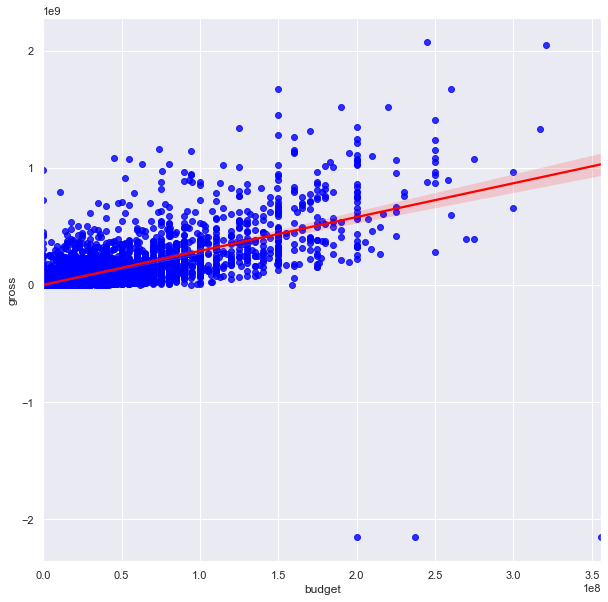

In [75]:
f,axes = plt.subplots(1,1, figsize=(10,10))
sb.regplot(x='budget', y='gross', data=top3, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

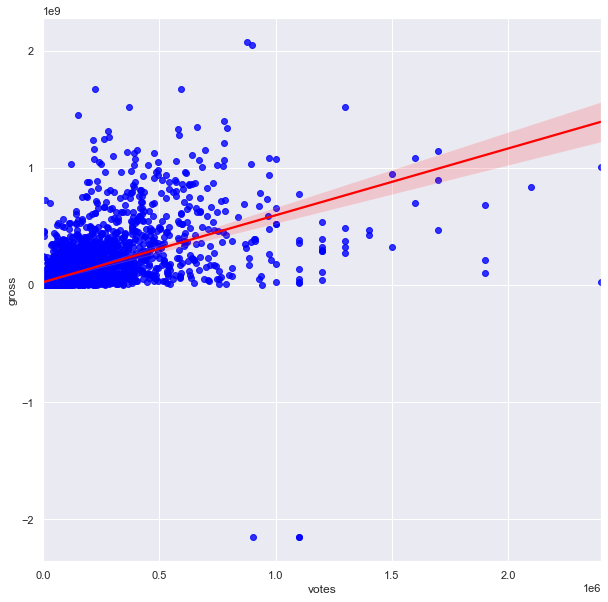

In [74]:
f,axes = plt.subplots(1,1, figsize=(10,10))
sb.regplot(x='votes', y='gross', data=top3, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'})

<AxesSubplot:xlabel='year', ylabel='gross'>

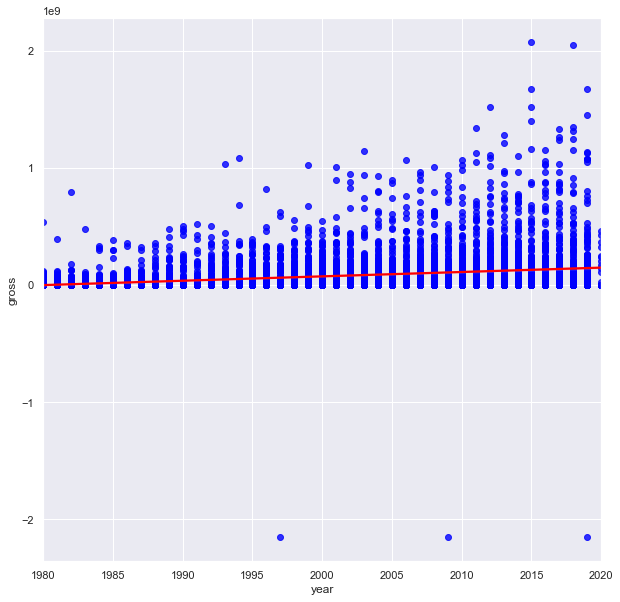

In [73]:
f,axes = plt.subplots(1,1, figsize=(10,10))
sb.regplot(x='year', y='gross', data=top3, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'})